In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv("distance_dataset (1).csv")
df.head()

,Unnamed: 0,X,Y,Z,ClusterID
0,0,5.135779,4.167542,5.787635,4
1,1,4.280721,5.770909,6.091044,4
2,2,8.329098,7.540436,3.247239,2
3,3,5.470224,5.069249,5.768313,4
4,4,2.381797,2.402374,3.879101,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   X           2000 non-null   float64
 2   Y           2000 non-null   float64
 3   Z           2000 non-null   float64
 4   ClusterID   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB


In [54]:
print(df.columns)

Index(['Unnamed: 0', 'X', 'Y', 'Z', 'ClusterID'], dtype='object')


In [56]:
df_clean = df.drop(columns=['Unnamed: 0'])

In [58]:
df_clean.head()

,X,Y,Z,ClusterID
0,5.135779,4.167542,5.787635,4
1,4.280721,5.770909,6.091044,4
2,8.329098,7.540436,3.247239,2
3,5.470224,5.069249,5.768313,4
4,2.381797,2.402374,3.879101,1


In [60]:
features = df_clean[['X', 'Y', 'Z']]

In [62]:
from sklearn.preprocessing import normalize


features_normalized = normalize(features)


In [64]:
cos_sim_matrix = cosine_similarity(features_normalized)

print(cos_sim_matrix.shape)
cos_sim_matrix[:5, :5]

(2000, 2000)


array([[1.        , 0.98190549, 0.9047535 , 0.9968856 , 0.98805325],
       [0.98190549, 1.        , 0.89819848, 0.98867643, 0.98359519],
       [0.9047535 , 0.89819848, 1.        , 0.92972727, 0.83976096],
       [0.9968856 , 0.98867643, 0.92972727, 1.        , 0.98052894],
       [0.98805325, 0.98359519, 0.83976096, 0.98052894, 1.        ]])

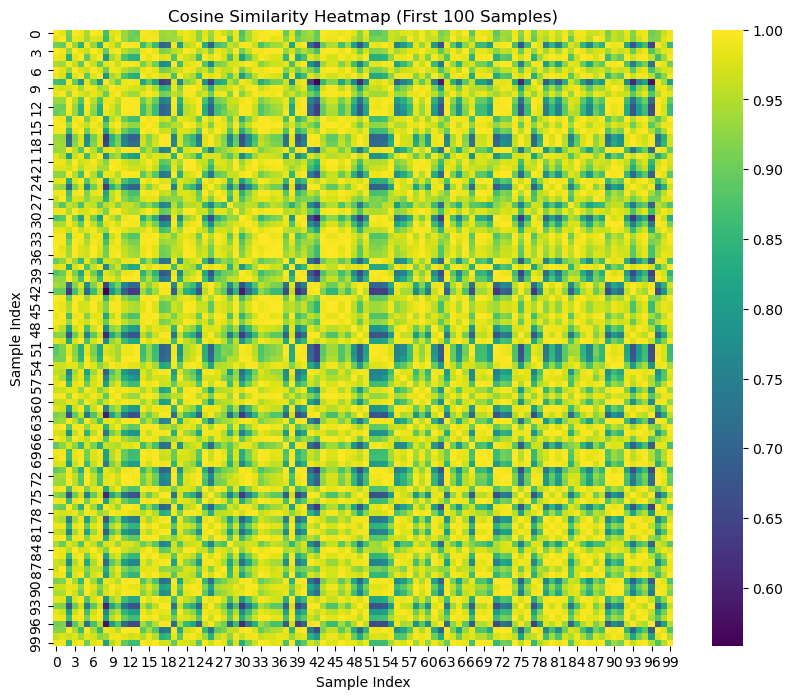

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix[:100, :100], cmap='viridis')
plt.title("Cosine Similarity Heatmap (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Sample Index")
plt.show()

In [69]:
np.fill_diagonal(cos_sim_matrix, -1)

max_sim_indices = np.unravel_index(np.argmax(cos_sim_matrix), cos_sim_matrix.shape)
print(f"Most similar pair: {max_sim_indices}")
print(f"Cosine similarity: {cos_sim_matrix[max_sim_indices]}")

Most similar pair: (739, 1699)
Cosine similarity: 0.9999999964870363


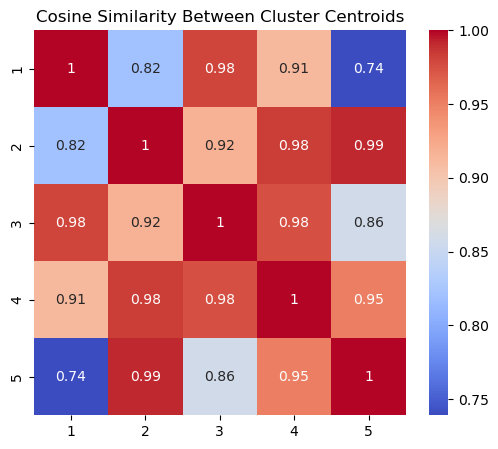

In [71]:
cluster_groups = df_clean.groupby('ClusterID')[['X', 'Y', 'Z']].mean()

cluster_vectors = normalize(cluster_groups)

cluster_sim = cosine_similarity(cluster_vectors)


plt.figure(figsize=(6, 5))
sns.heatmap(cluster_sim, annot=True, cmap='coolwarm', xticklabels=cluster_groups.index, yticklabels=cluster_groups.index)
plt.title("Cosine Similarity Between Cluster Centroids")
plt.show()